In [2]:
# importing data visualization and manipulation libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importing machine learning libraries

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# 데이터 import


df = pd.read_csv('./data/CO2 Emissions_Canada.csv')

In [4]:
df


Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [5]:
# null 데이터 확인


df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2_emission                      7385 non-null   int64  
dtypes: flo

In [6]:
# 주로 쓰는 컬럼은 쉽게 변경

df.rename(columns={'CO2 Emissions(g/km)' : 'CO2_emission'}, inplace=True)

In [7]:
# 글로벌 copy()

df2 = df.copy()

In [8]:
# 컬럼명 쉽게 변경 

df2.rename(columns={'Fuel Consumption Comb (L/100 km)' : 'Fuel_Cons_comb_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Consumption Hwy (L/100 km)' : 'Fuel_Cons_hwy_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Consumption City (L/100 km)' : 'Fuel_Cons_city_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Type' : 'Fuel_type'}, inplace=True)
df2.rename(columns={'CO2 Emissions(g/km)' : 'CO2_emission'}, inplace=True)


df2

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel_type  Fuel_Cons_city_(l/100km)  \
0             AS5         Z                       9.9   
1              M6         Z                      11.2   
2             AV7         Z                       6.0   
3             AS6         Z                      12.7   
4             AS6         Z                      12.1   
...           ...       ...                       ...   
7380          AS8         Z                      10.7   
7381          AS8         Z                      11.2   
7382          AS8         Z                      11.7   
7383          AS8         Z                      11.2   
7384          AS8         Z                      12.2   

      Fuel_Cons_hwy_(l/100km)  Fuel_Cons_comb_(l/100km)  \
0                         6.7                       8.5   
1                         7.7                       9.6   
2                         5.8                       5.9   
3                         9.1                      11.1   
4                         8.7                      10.6   
...                       ...                       ...   
7380                      7.7                       9.4   
7381                      8.3                       9.9   
7382                      8.6                      10.3   
7383                      8.3                       9.9   
7384                      8.7                      10.7   

      Fuel Consumption Comb (mpg)  CO2_emission  
0                              33           196  
1                              29           221  
2                              48           136  
3                              25           255  
4                              27           244  
...                           ...           ...  
7380                           30           219  
7381                           29           232  
7382                           27           240  
7383                           29           232  
7384                           26           248  

[7385 rows x 12 columns]

### CO2 배출량에 대해서 히스토그램.

In [9]:
import plotly.express as px

fig = px.histogram(df2, x='CO2_emission')
fig.show()

### df2 ==> LabelEncoding

In [18]:
from sklearn.preprocessing import LabelEncoder 

encode = LabelEncoder()

encode.fit(df2.Make.drop_duplicates()) 
df2.Make = encode.transform(df2.Make)

encode.fit(df2.Transmission.drop_duplicates())
df2.Transmission = encode.transform(df2.Transmission)

encode.fit(df2.Fuel_type.drop_duplicates()) 
df2.Fuel_type = encode.transform(df2.Fuel_type)

encode.fit(df2.Model.drop_duplicates())
df2.Model = encode.transform(df2.Model)

df2.rename(columns={'Vehicle Class' : 'Vehicle_class'}, inplace=True)

encode.fit(df2.Vehicle_class.drop_duplicates())
df2.Vehicle_class = encode.transform(df2.Vehicle_class)

In [45]:
df2

Make  Model  Vehicle_class  Engine Size(L)  Cylinders  Transmission  \
0        0   1057              0             2.0          4            14   
1        0   1057              0             2.4          4            25   
2        0   1058              0             1.5          4            22   
3        0   1233             11             3.5          6            15   
4        0   1499             11             3.5          6            15   
...    ...    ...            ...             ...        ...           ...   
7380    41   1951             11             2.0          4            17   
7381    41   1957             11             2.0          4            17   
7382    41   1960             11             2.0          4            17   
7383    41   1968             12             2.0          4            17   
7384    41   1969             12             2.0          4            17   

      Fuel_type  Fuel_Cons_city_(l/100km)  Fuel_Cons_hwy_(l/100km)  \
0             4                       9.9                      6.7   
1             4                      11.2                      7.7   
2             4                       6.0                      5.8   
3             4                      12.7                      9.1   
4             4                      12.1                      8.7   
...         ...                       ...                      ...   
7380          4                      10.7                      7.7   
7381          4                      11.2                      8.3   
7382          4                      11.7                      8.6   
7383          4                      11.2                      8.3   
7384          4                      12.2                      8.7   

      Fuel_Cons_comb_(l/100km)  Fuel Consumption Comb (mpg)  CO2_emission  
0                          8.5                           33           196  
1                          9.6                           29           221  
2                          5.9                           48           136  
3                         11.1                           25           255  
4                         10.6                           27           244  
...                        ...                          ...           ...  
7380                       9.4                           30           219  
7381                       9.9                           29           232  
7382                      10.3                           27           240  
7383                       9.9                           29           232  
7384                      10.7                           26           248  

[7385 rows x 12 columns]

### 상관계수 파악

In [19]:
df2.corr()

Make     Model  Vehicle_class  \
Make                         1.000000  0.012679      -0.029558   
Model                        0.012679  1.000000       0.190713   
Vehicle_class               -0.029558  0.190713       1.000000   
Engine Size(L)              -0.146199  0.070426       0.142704   
Cylinders                   -0.162065  0.048399       0.105978   
Transmission                 0.181923 -0.016260      -0.156562   
Fuel_type                    0.045368 -0.079554      -0.033560   
Fuel_Cons_city_(l/100km)    -0.197389  0.101590       0.240941   
Fuel_Cons_hwy_(l/100km)     -0.126010  0.161755       0.329828   
Fuel_Cons_comb_(l/100km)    -0.175238  0.123675       0.274388   
Fuel Consumption Comb (mpg)  0.182649 -0.098375      -0.277606   
CO2_emission                -0.151955  0.105847       0.286468   

                             Engine Size(L)  Cylinders  Transmission  \
Make                              -0.146199  -0.162065      0.181923   
Model                              0.070426   0.048399     -0.016260   
Vehicle_class                      0.142704   0.105978     -0.156562   
Engine Size(L)                     1.000000   0.927653     -0.322389   
Cylinders                          0.927653   1.000000     -0.270011   
Transmission                      -0.322389  -0.270011      1.000000   
Fuel_type                          0.058296   0.125175      0.212872   
Fuel_Cons_city_(l/100km)           0.831379   0.800702     -0.345839   
Fuel_Cons_hwy_(l/100km)            0.761526   0.715252     -0.355371   
Fuel_Cons_comb_(l/100km)           0.817060   0.780534     -0.353609   
Fuel Consumption Comb (mpg)       -0.757854  -0.719321      0.331213   
CO2_emission                       0.851145   0.832644     -0.316660   

                             Fuel_type  Fuel_Cons_city_(l/100km)  \
Make                          0.045368                 -0.197389   
Model                        -0.079554                  0.101590   
Vehicle_class                -0.033560                  0.240941   
Engine Size(L)                0.058296                  0.831379   
Cylinders                     0.125175                  0.800702   
Transmission                  0.212872                 -0.345839   
Fuel_type                     1.000000                 -0.075605   
Fuel_Cons_city_(l/100km)     -0.075605                  1.000000   
Fuel_Cons_hwy_(l/100km)      -0.129812                  0.948180   
Fuel_Cons_comb_(l/100km)     -0.095539                  0.993810   
Fuel Consumption Comb (mpg)  -0.016880                 -0.927059   
CO2_emission                  0.100306                  0.919592   

                             Fuel_Cons_hwy_(l/100km)  \
Make                                       -0.126010   
Model                                       0.161755   
Vehicle_class                               0.329828   
Engine Size(L)                              0.761526   
Cylinders                                   0.715252   
Transmission                               -0.355371   
Fuel_type                                  -0.129812   
Fuel_Cons_city_(l/100km)                    0.948180   
Fuel_Cons_hwy_(l/100km)                     1.000000   
Fuel_Cons_comb_(l/100km)                    0.977299   
Fuel Consumption Comb (mpg)                -0.890638   
CO2_emission                                0.883536   

                             Fuel_Cons_comb_(l/100km)  \
Make                                        -0.175238   
Model                                        0.123675   
Vehicle_class                                0.274388   
Engine Size(L)                               0.817060   
Cylinders                                    0.780534   
Transmission                                -0.353609   
Fuel_type                                   -0.095539   
Fuel_Cons_city_(l/100km)                     0.993810   
Fuel_Cons_hwy_(l/100km)                      0.977299   
Fuel_Cons_comb_(l/100km)                     1.000000

### 히트맵

<AxesSubplot:>

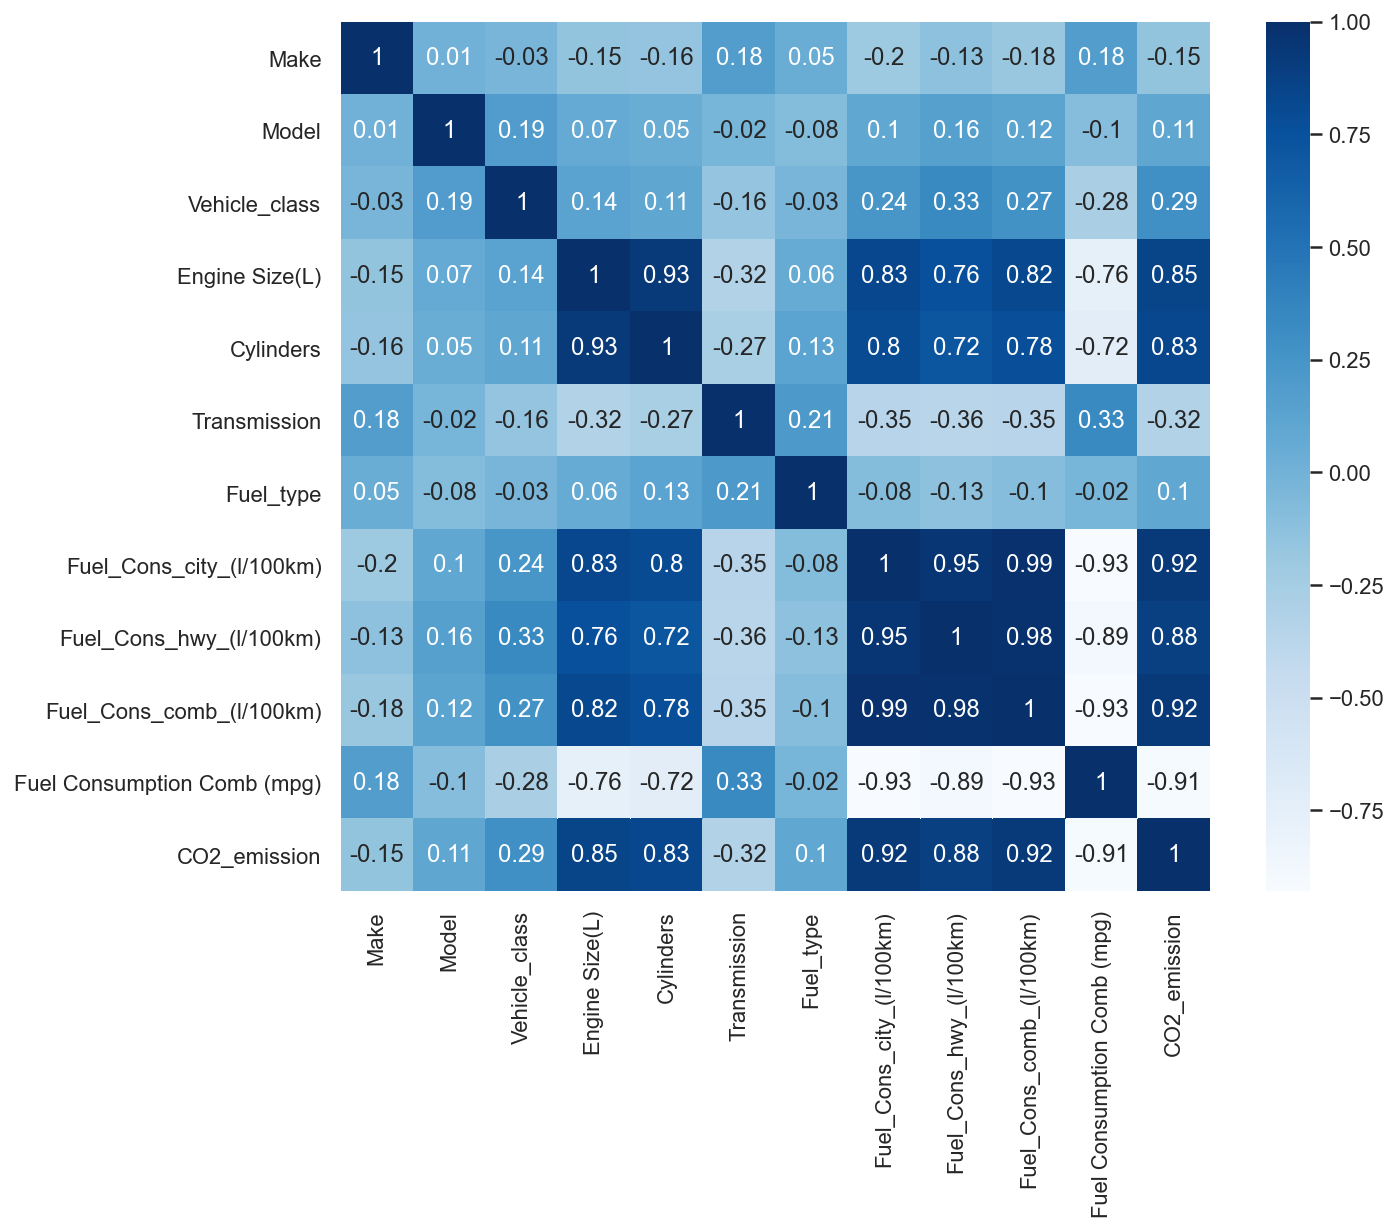

In [20]:
%matplotlib inline

corr_mat = df2.corr().round(2)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr_mat, cmap = 'Blues', square = True, annot=True)

### CO2_emission과의 상관관계가 높은 순으로 정렬

In [31]:
df2.corr()['CO2_emission'].sort_values(ascending=False)

CO2_emission                   1.000000
Fuel_Cons_city_(l/100km)       0.919592
Fuel_Cons_comb_(l/100km)       0.918052
Fuel_Cons_hwy_(l/100km)        0.883536
Engine Size(L)                 0.851145
Cylinders                      0.832644
Vehicle_class                  0.286468
Model                          0.105847
Fuel_type                      0.100306
Make                          -0.151955
Transmission                  -0.316660
Fuel Consumption Comb (mpg)   -0.907426
Name: CO2_emission, dtype: float64

###  seaborn의 pairplot 함수도 이용

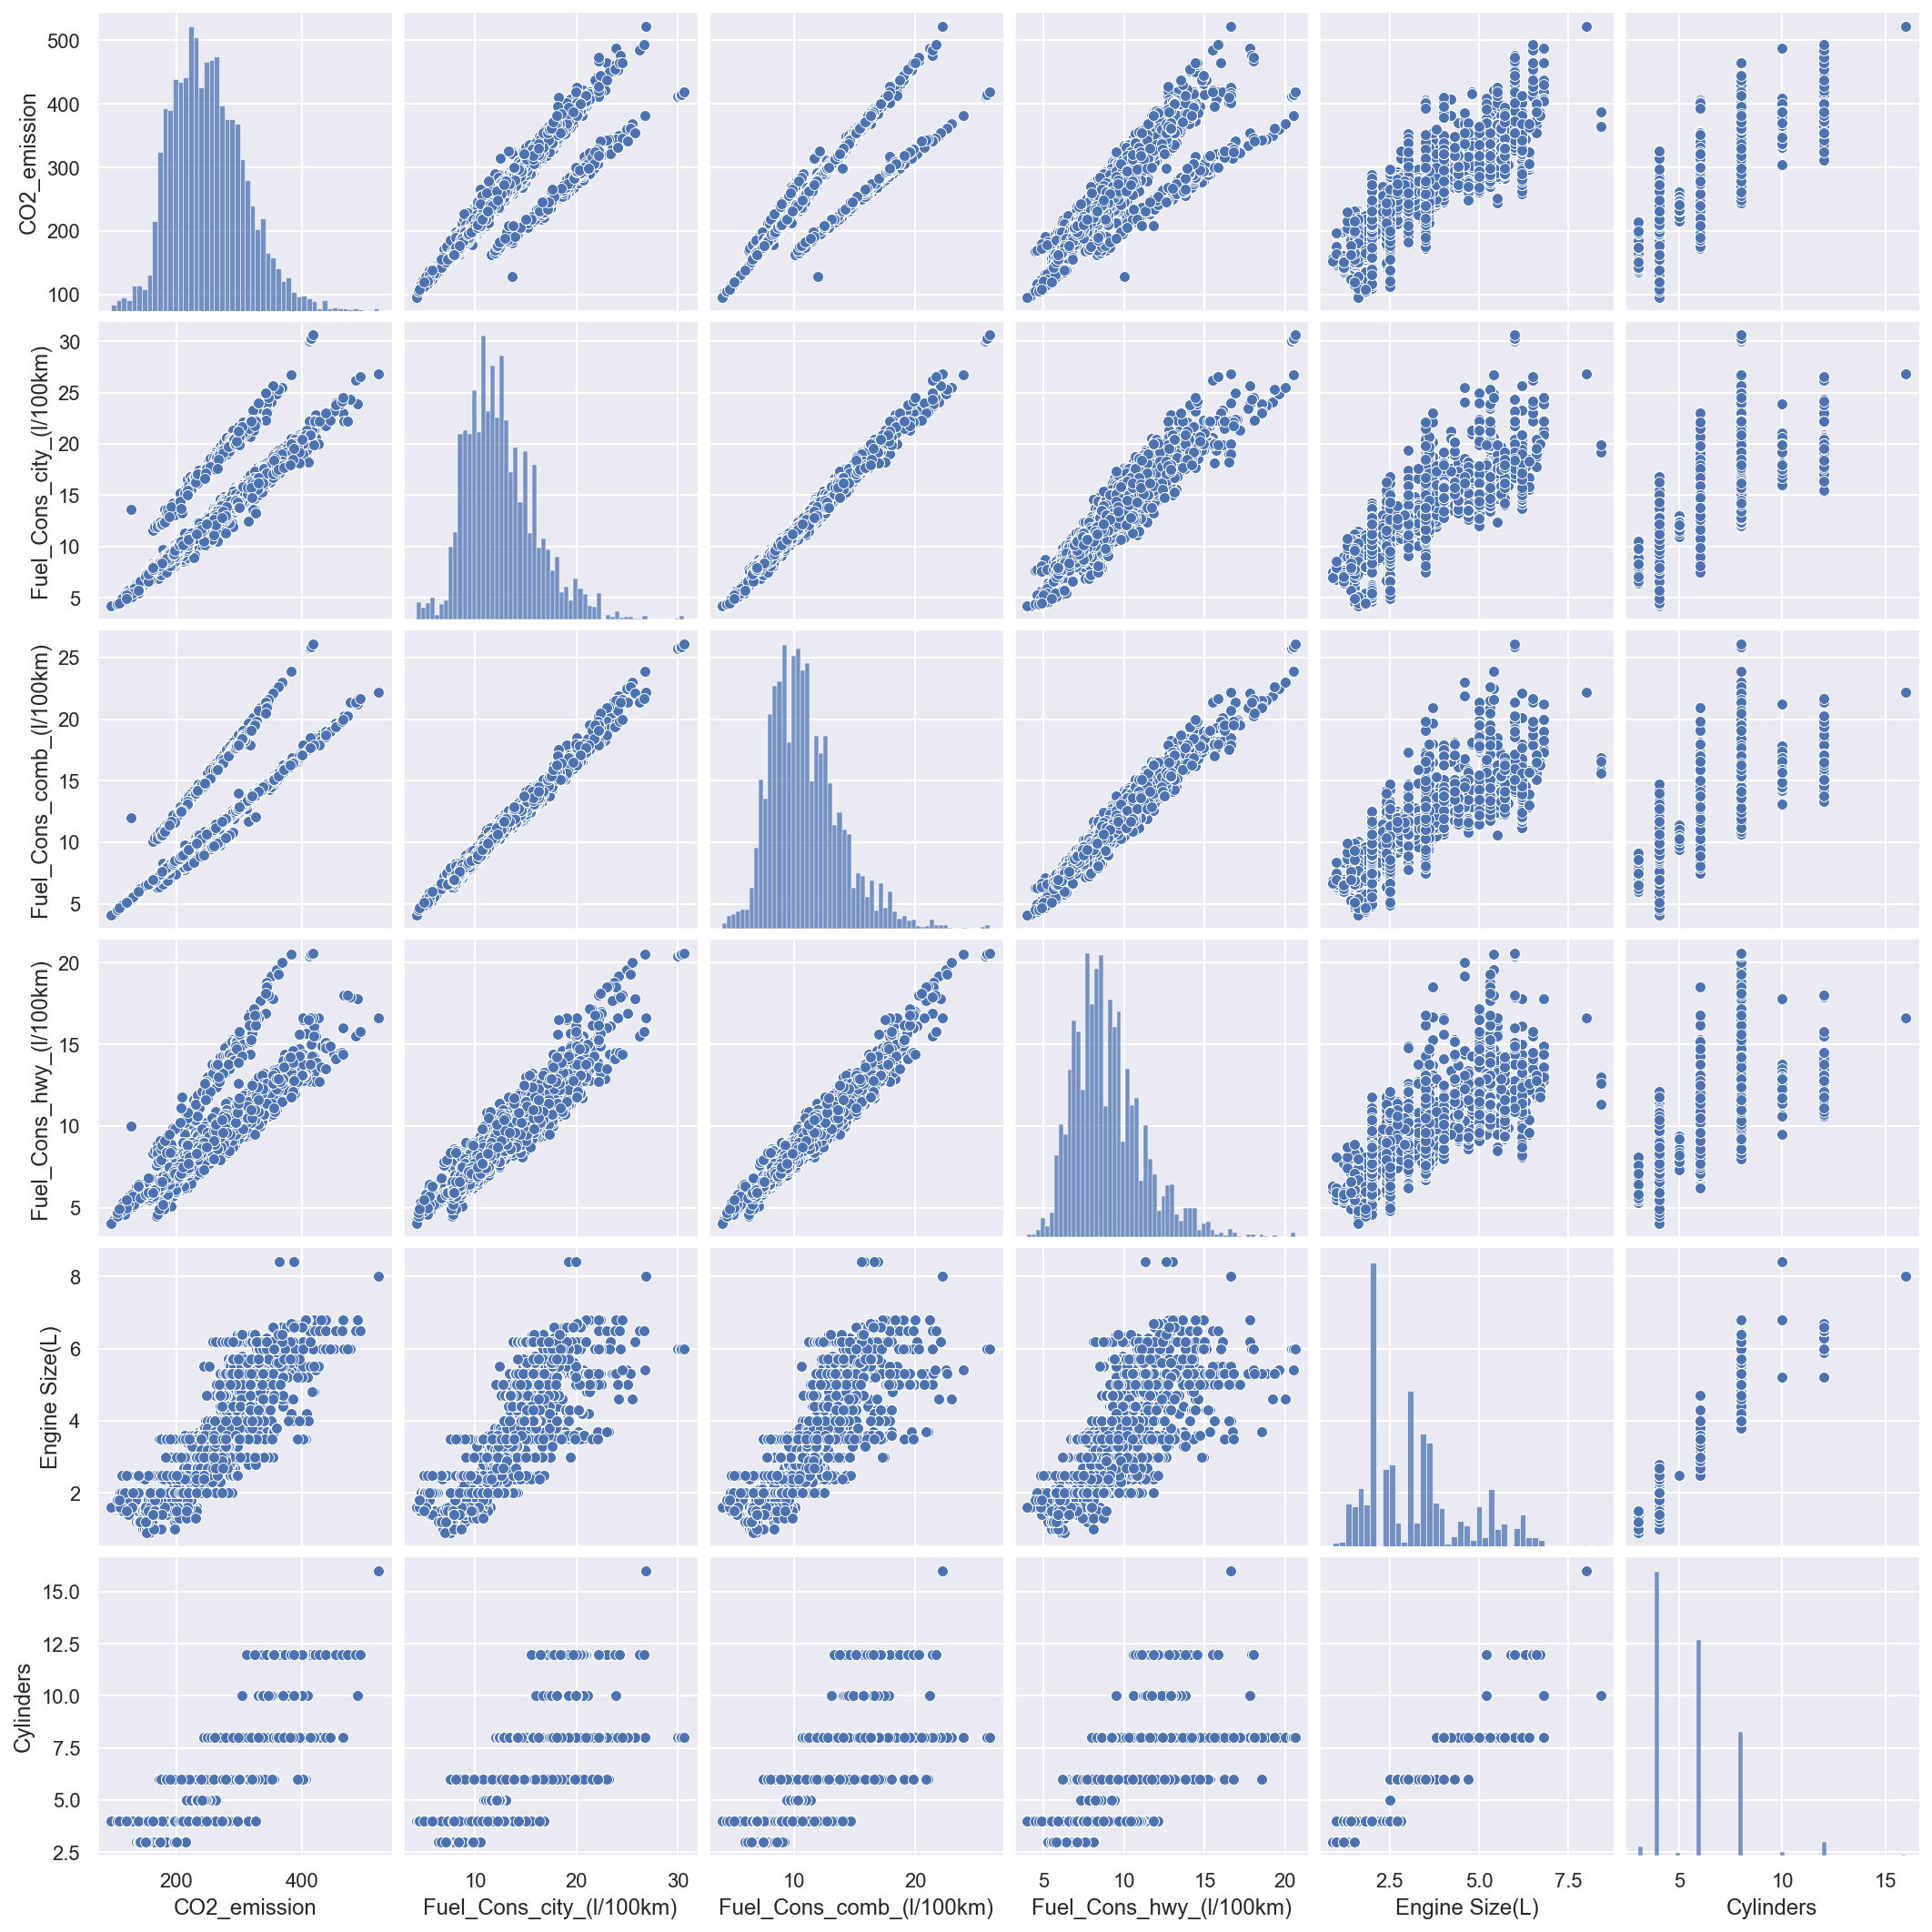

In [44]:
sns.pairplot(df2, vars=['CO2_emission', 'Fuel_Cons_city_(l/100km)', 'Fuel_Cons_comb_(l/100km)', 'Fuel_Cons_hwy_(l/100km)', 'Engine Size(L)', 'Cylinders'])

### 생산 회사별 데이터 갯수 확인

In [49]:
df['Make'].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

C:\Users\sh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'FORD'),
  Text(1, 0, 'CHEVROLET'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'MERCEDES-BENZ'),
  Text(4, 0, 'PORSCHE'),
  Text(5, 0, 'TOYOTA'),
  Text(6, 0, 'GMC'),
  Text(7, 0, 'AUDI'),
  Text(8, 0, 'NISSAN'),
  Text(9, 0, 'JEEP'),
  Text(10, 0, 'DODGE'),
  Text(11, 0, 'KIA'),
  Text(12, 0, 'HONDA'),
  Text(13, 0, 'HYUNDAI'),
  Text(14, 0, 'MINI'),
  Text(15, 0, 'VOLKSWAGEN'),
  Text(16, 0, 'MAZDA'),
  Text(17, 0, 'LEXUS'),
  Text(18, 0, 'JAGUAR'),
  Text(19, 0, 'CADILLAC'),
  Text(20, 0, 'SUBARU'),
  Text(21, 0, 'VOLVO'),
  Text(22, 0, 'INFINITI'),
  Text(23, 0, 'BUICK'),
  Text(24, 0, 'RAM'),
  Text(25, 0, 'LINCOLN'),
  Text(26, 0, 'MITSUBISHI'),
  Text(27, 0, 'CHRYSLER'),
  Text(28, 0, 'LAND ROVER'),
  Text(29, 0, 'FIAT'),
  Text(30, 0, 'ACURA'),
  Text(31, 0, 'MASERATI'),
  Text(32, 0

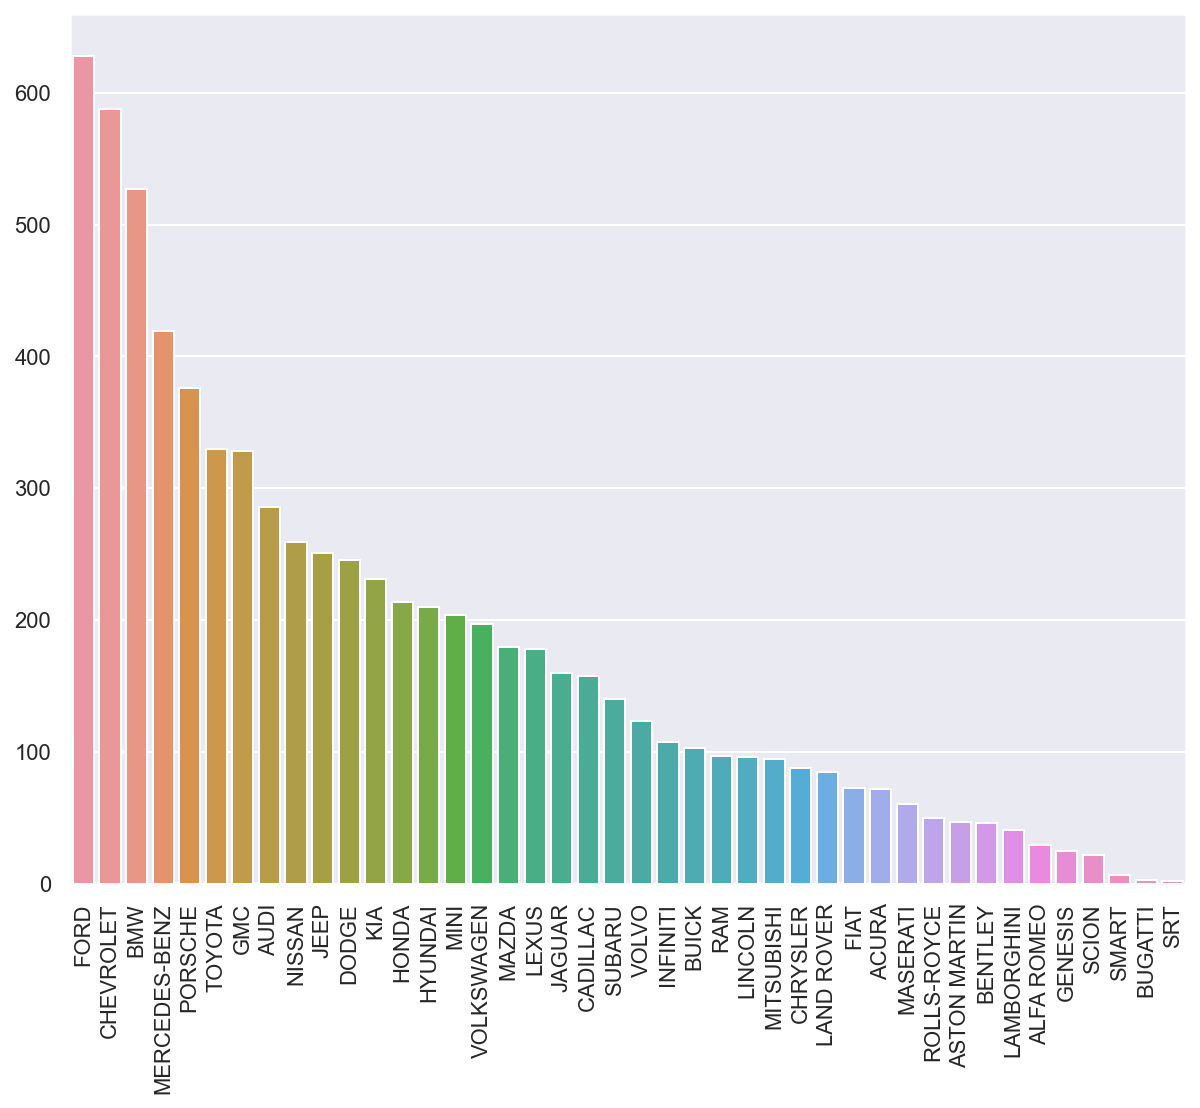

In [54]:
# 생산 회사 

mkI = df['Make'].value_counts().index
mkV = df['Make'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkI,mkV)
plt.xticks(rotation='vertical')

### 생산회사별 CO2 발생량 확인

In [59]:
pd.crosstab(df['Make'], df['CO2_emission'], margins=True)

CO2_emission   96  99  102  103  104  105  106  108  109  110  ...  465  467  \
Make                                                           ...             
ACURA           0   0    0    0    0    0    0    0    0    0  ...    0    0   
ALFA ROMEO      0   0    0    0    0    0    0    0    0    0  ...    0    0   
ASTON MARTIN    0   0    0    0    0    0    0    0    0    0  ...    0    0   
AUDI            0   0    0    0    0    0    0    0    0    0  ...    0    0   
BENTLEY         0   0    0    0    0    0    0    0    0    0  ...    1    0   
BMW             0   0    0    0    0    0    0    0    0    0  ...    0    0   
BUGATTI         0   0    0    0    0    0    0    0    0    0  ...    0    0   
BUICK           0   0    0    0    0    0    0    0    0    0  ...    0    0   
CADILLAC        0   0    0    0    0    0    0    0    0    0  ...    0    0   
CHEVROLET       0   0    0    0    0    0    0    0    0    0  ...    1    0   
CHRYSLER        0   0    0    0    0    0    0    0    0    0  ...    0    0   
DODGE           0   0    0    0    0    0    0    0    0    0  ...    0    0   
FIAT            0   0    0    0    0    0    0    0    0    0  ...    0    0   
FORD            0   0    0    0    0    0    0    0    0    0  ...    0    0   
GENESIS         0   0    0    0    0    0    0    0    0    0  ...    0    0   
GMC             0   0    0    0    0    0    0    0    0    0  ...    1    0   
HONDA           0   0    0    0    0    0    0    0    0    1  ...    0    0   
HYUNDAI         4   1    1    1    1    0    0    0    0    0  ...    0    0   
INFINITI        0   0    0    0    0    0    0    0    0    0  ...    0    0   
JAGUAR          0   0    0    0    0    0    0    0    0    0  ...    0    0   
JEEP            0   0    0    0    0    0    0    0    0    0  ...    0    0   
KIA             0   0    0    0    0    0    0    0    0    4  ...    0    0   
LAMBORGHINI     0   0    0    0    0    0    0    0    0    0  ...    0    0   
LAND ROVER      0   0    0    0    0    0    0    0    0    0  ...    0    0   
LEXUS           0   0    0    0    0    0    0    0    0    0  ...    0    0   
LINCOLN         0   0    0    0    0    0    0    0    0    0  ...    0    0   
MASERATI        0   0    0    0    0    0    0    0    0    0  ...    0    0   
MAZDA           0   0    0    0    0    0    0    0    0    0  ...    0    0   
MERCEDES-BENZ   0   0    0    0    0    0    0    0    0    0  ...    0    1   
MINI            0   0    0    0    0    0    0    0    0    0  ...    0    0   
MITSUBISHI      0   0    0    0    0    0    0    0    0    0  ...    0    0   
NISSAN          0   0    0    0    0    0    0    0    0    0  ...    0    0   
PORSCHE         0   0    0    0    0    0    0    0    0    0  ...    0    0   
RAM             0   0    0    0    0    0    0    0    0    0  ...    0    0   
ROLLS-ROYCE     0   0    0    0    0    0    0    0    0    0  ...    0    0   
SCION           0   0    0    0    0    0    0    0    0    0  ...    0    0   
SMART           0   0    0    0    0    0    0    0    0    0  ...    0    0   
SRT             0   0    0    0    0    0    0    0    0    0  ...    0    0   
SUBARU          0   0    0    0    0    0    0    0    0    0  ...    0    0   
TOYOTA          0   0    0    0    1    3    2    2    2    2  ...    0    0   
VOLKSWAGEN      0   0    0    0    0    0    0    0    0    0  ...    0    0   
VOLVO           0   0    0    0    0    0    0    0    0    0  ...    0    0   
All             4   1    1    1    2    3    2    2    2    7  ...    3    1   

CO2_emission   473  476  485  487  488  493  522   All  
Make                                                    
ACURA            0    0    0    0    0    0    0    72  
ALFA ROMEO       0    0    0    0    0    0    0    30  
ASTON MARTIN     0    0    0    0    0    0    0    47  
AUDI             0    0    0    0    0    0    0   286  
BENTLEY          0    0    0    0    0    0    0    46  


```

CO2_emission 과 Fuel_Cons_city_(l/100km)/Fuel_Cons_comb_(l/100km)/Fuel_Cons_hwy_(l/100km) 는 당연히 선형적으로 관계가 있음. 따라서 CO2 배출량과의 상관관계를 회귀분석하는 것은 적절하지 않다고 판단

생산 회사의 데이터, 차종의 갯수와 특성이 같은 상태에서는 CO2 배출량을 회사간 비교분석이 가능하겠지만,
현재 주어진 데이터로는 간단하게 비교분석이 어렵다.

따라서 각 회사별로 생산해낸 차종들의 cylinder의 갯수와 CO2 배출량과의 상관관계를 rmse로 구해놓으면 각 회사들끼리 rmse를 비교하여 어떤 회사가 비교적 CO2 배출량이 높고낮음을 파악할 수 있겠다. 

```